In [35]:
import warnings
import json
from pandas.io.json import json_normalize

warnings.filterwarnings(action='ignore')
import numpy as np  # 수치계산, 배열 처리를 위해 import 한다.
import pandas as pd  # 데이터 분석을 위한 전처리를 위해 import 한다.
import matplotlib as mpl  # matplolib에서 음수 데이터의 '-'부호가 깨지는 것을 방지하기위해 import 한다.

mpl.rcParams['axes.unicode_minus'] = False  # matplolib에서 음수 데이터의 '-'부호가 깨지는 것을 방지한다.
import matplotlib.pyplot as plt  # 시각화를 하기 위해 import 한다.

plt.rcParams["font.size"] = 10  # matplolib에서 사용할 글꼴 크기 설정
plt.rcParams["font.family"] = "NanumGothicCoding"  # matplolib에서 사용할 글꼴 설정
import seaborn as sns  # 시각화를 하기 위해 import 한다. matplolib 기반으로 만든 시각화 도구

pd.options.display.float_format = '{:,.5f}'.format
from plotnine import *  # R의 ggplot2 패키지를 사용하는 것 처럼 사용하는 시각화 도구를 import 한다.
import missingno as msno  # 누락값의 분포를 그래프 형태로 보기위해 import 한다.
import folium  # 지도 시각화를 하기 위해 import 한다.
from wordcloud import WordCloud

In [36]:
rank = pd.read_csv('data/rank.csv')
rank

,userNum,nickname,gameId,seasonId,matchingMode,matchingTeamMode,characterNum,skinCode,characterLevel,gameRank,...,skillLevelInfo.1026310,skillLevelInfo.1006310,skillLevelInfo.1055430,skillLevelInfo.1012310,Unnamed: 0,skillLevelInfo.1026420,skillLevelInfo.1036410,eventMissionResult.162,skillLevelInfo.1040310,skillLevelInfo.1041210
0,725291,셀쓰녀가취향,22615555,15,3,3,39,1039001,18,1,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,725291,셀쓰녀가취향,22614952,15,3,3,39,1039001,16,2,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,725291,셀쓰녀가취향,22614596,15,3,3,46,1046000,10,6,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,725291,셀쓰녀가취향,22613843,15,3,3,46,1046000,16,1,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,1199780,탐피,22618328,15,3,3,2,1002002,15,2,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19242,376780,Senzawa,22624651,15,3,3,17,1017000,16,2,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
19243,376780,Senzawa,22624511,15,3,3,17,1017000,16,1,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
19244,376780,Senzawa,22624365,15,3,3,17,1017000,16,3,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
19245,376780,Senzawa,22618067,15,3,3,46,1046000,15,1,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [37]:
characterNamesEn = pd.read_csv('data/characterList - origin.csv')  # 캐릭터 영문명
characterNamesKr = pd.read_csv('data/characterList - changed.csv')  # 캐릭터 한글명
skinNames = pd.read_csv('data/skin - changed.csv')  # 스킨
weaponNames = pd.read_csv('data/weapon - changed.csv')  # 무기
armorNames = pd.read_csv('data/armor - changed.csv')  # 방어구

characterNum: 캐릭터 코드

skinCode: 스킨 코드

mmrGain: 획득 MMR, escapeState: 탈출, gameRank: 등수,  playerKill: 킬수,  victory: 승리
damageToPlayer: 플레이어에게 준 데미지, damageToMonster: 야동에게 가한 데미지 => 지표 분석용

equipment.0 ~ equipment.5: 최종 착용 장비, equipFirstItemForLog.0 ~ equipFirstItemForLog.6: 최초 착용 장비 => 메타 분석용



In [38]:
# 캐릭터 62개 각각 아래자료 뽑아야함

code1 = pd.DataFrame()
Jakie = pd.concat([code1, rank[rank.characterNum == 1]], ignore_index=True)

# 가장 많이 사용한 스킨, 사용 횟수
print(
    f'"mostSkin" : "{skinNames[skinNames.code == int(Jakie.skinCode.value_counts().head(1).index[0])].values[0][0]}", "mostSkinCount" :  {Jakie.skinCode.value_counts().head(1).values[0]}')

'''지표 분석용'''
# 평균 플레이어 킬수
print(f'"averageKillPlayer" : {Jakie.playerKill.mean():.2f}')
# 평균 플레이어 데미지
print(f'"averageDamegeToPlayer" : {Jakie.damageToPlayer.mean():.2f}')
# 평균 야동 킬수
print(f'"averageKillMonster" : {Jakie.monsterKill.mean():.2f}')
# 평균 야동 데미지
print(f'"averageDamegeToMonster" : {Jakie.damageToMonster.mean():.2f}')
# 게임 플레이 수
print(f'"totalGames" : {Jakie.count()[0]}')
# 평균 승률
print(f'"winRate" : {661 / Jakie[Jakie.victory == 1].victory.count():.2f}')
# 평균 등수
print(f'"averageRank" : {Jakie[Jakie.escapeState != 3].gameRank.mean():.2f}')
# 탈출 횟수
print(f'"escapeCount" : {Jakie[Jakie.escapeState == 3].escapeState.count()}')
# 평균 mmr 획득률
print(f'"averageMMR" : {Jakie.mmrGain.mean():.2f}')

'''메타 분석용'''
# 승리했던 경기에서 가장 많이 사용한 최종 아이템, 사용 횟수
print(
    f'"winWeapon" : "{weaponNames[weaponNames.code == int(Jakie[Jakie.victory == 1]["equipment.0"].value_counts().head(1).index[0])].values[0][1]}", "winWeaponCount" : {Jakie[Jakie.victory == 1]["equipment.0"].value_counts().head(1).values[0]}')
print(
    f'"winBody" : "{armorNames[armorNames.code == int(Jakie[Jakie.victory == 1]["equipment.1"].value_counts().head(1).index[0])].values[0][1]}", "winBodyCount" : {Jakie[Jakie.victory == 1]["equipment.1"].value_counts().head(1).values[0]}')
print(
    f'"winHead" : "{armorNames[armorNames.code == int(Jakie[Jakie.victory == 1]["equipment.2"].value_counts().head(1).index[0])].values[0][1]}", "winHeadCount" : {Jakie[Jakie.victory == 1]["equipment.2"].value_counts().head(1).values[0]}')
print(
    f'"winArm" : "{armorNames[armorNames.code == int(Jakie[Jakie.victory == 1]["equipment.3"].value_counts().head(1).index[0])].values[0][1]}", "winArmCount" : {Jakie[Jakie.victory == 1]["equipment.3"].value_counts().head(1).values[0]}')
print(
    f'"winFoot" : "{armorNames[armorNames.code == int(Jakie[Jakie.victory == 1]["equipment.4"].value_counts().head(1).index[0])].values[0][1]}", "winFootCount" : {Jakie[Jakie.victory == 1]["equipment.4"].value_counts().head(1).values[0]}')
print(
    f'"winTinkled" : "{armorNames[armorNames.code == int(Jakie[Jakie.victory == 1]["equipment.5"].value_counts().head(1).index[0])].values[0][1]}", "winTinkledCount" : {Jakie[Jakie.victory == 1]["equipment.5"].value_counts().head(1).values[0]}')

# 가장 많이 선택한 루트 아이템, 사용 횟수
print(
    f'"routeWeapon" : "{weaponNames[weaponNames.code == int(Jakie["equipFirstItemForLog.0"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeWeaponCount" : {Jakie["equipFirstItemForLog.0"].value_counts().head(1)[0]}')
print(
    f'"routeBody" : "{armorNames[armorNames.code == int(Jakie["equipFirstItemForLog.1"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeBodyCount" : {Jakie["equipFirstItemForLog.1"].value_counts().head(1)[0]}')
print(
    f'"routeHead" : "{armorNames[armorNames.code == int(Jakie["equipFirstItemForLog.2"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeHeadCount" : {Jakie["equipFirstItemForLog.2"].value_counts().head(1)[0]}')
print(
    f'"routeArm" : "{armorNames[armorNames.code == int(Jakie["equipFirstItemForLog.3"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeArmCount" : {Jakie["equipFirstItemForLog.3"].value_counts().head(1)[0]}')
print(
    f'"routeFoot" : "{armorNames[armorNames.code == int(Jakie["equipFirstItemForLog.4"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeFootCount" : {Jakie["equipFirstItemForLog.4"].value_counts().head(1)[0]}')
# print(f'"routeTinkled" : "{armorNames[armorNames.code==int(Jakie["equipFirstItemForLog.5"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeTinkledCount" : "{Jakie["equipFirstItemForLog.5"].value_counts().head(1)[0]}"')
print(f'"routeTinkled" : "", "routeTinkledCount" : ""')

"mostSkin" : "시스템쇼크 재키", "mostSkinCount" :  195
"averageKillPlayer" : 2.96
"averageDamegeToPlayer" : 8293.12
"averageKillMonster" : 29.51
"averageDamegeToMonster" : 38051.72
"totalGames" : 661
"winRate" : 3.84
"averageRank" : 2.96
"escapeCount" : 49
"averageMMR" : 10.14
"winWeapon" : "프라가라흐", "winWeaponCount" : 54
"winBody" : "버건디47", "winBodyCount" : 54
"winHead" : "빛의증표", "winHeadCount" : 82
"winArm" : "레이더", "winArmCount" : 45
"winFoot" : "알렉산드로스", "winFootCount" : 59
"winTinkled" : "운명의주사위", "winTinkledCount" : 38
"routeWeapon" : "디오스쿠로이", "routeWeaponCount" : 173
"routeBody" : "집사복", "routeBodyCount" : 212
"routeHead" : "수정티아라", "routeHeadCount" : 340
"routeArm" : "바이탈센서", "routeArmCount" : 437
"routeFoot" : "경량화부츠", "routeFootCount" : 297
"routeTinkled" : "", "routeTinkledCount" : ""


In [39]:
print(
    f'{"{"}"character" : "{characterNamesKr.name[0]}", '
    f'"mostSkin" : "{skinNames[skinNames.code == int(Jakie.skinCode.value_counts().head(1).index[0])].values[0][0]}", "mostSkinCount" : {Jakie.skinCode.value_counts().head(1).values[0]}, '
    # 평균 플레이어 킬수
    f'"averageKillPlayer" : {Jakie.playerKill.mean():.2f}, '
    # 평균 플레이어 데미지
    f'"averageDamegeToPlayer" : {Jakie.damageToPlayer.mean():.2f}, '
    # 평균 야동 킬수
    f'"averageKillMonster" : {Jakie.monsterKill.mean():.2f}, '
    # 평균 야동 데미지
    f'"averageDamegeToMonster" : {Jakie.damageToMonster.mean():.2f}, '
    # 게임 플레이 수
    f'"totalGames" : {Jakie.count()[0]}, '
    # 평균 승률
    f'"winRate" : {661 / Jakie[Jakie.victory == 1].victory.count():.2f}, '
    # 평균 등수
    f'"averageRank" : {Jakie[Jakie.escapeState != 3].gameRank.mean():.2f}, '
    # 탈출 횟수
    f'"escapeCount" : {Jakie[Jakie.escapeState == 3].escapeState.count()}, '
    # 평균 mmr 획득률
    f'"averageMMR" : {Jakie.mmrGain.mean():.2f}, '
    # 승리했던 경기에서 가장 많이 사용한 최종 아이템, 사용 횟수
    f'"winWeapon" : "{weaponNames[weaponNames.code == int(Jakie[Jakie.victory == 1]["equipment.0"].value_counts().head(1).index[0])].values[0][1]}", "winWeaponCount" : {Jakie[Jakie.victory == 1]["equipment.0"].value_counts().head(1).values[0]}, '
    f'"winBody" : "{armorNames[armorNames.code == int(Jakie[Jakie.victory == 1]["equipment.1"].value_counts().head(1).index[0])].values[0][1]}", "winBodyCount" : {Jakie[Jakie.victory == 1]["equipment.1"].value_counts().head(1).values[0]}, '
    f'"winHead" : "{armorNames[armorNames.code == int(Jakie[Jakie.victory == 1]["equipment.2"].value_counts().head(1).index[0])].values[0][1]}", "winHeadCount" : {Jakie[Jakie.victory == 1]["equipment.2"].value_counts().head(1).values[0]}, '
    f'"winArm" : "{armorNames[armorNames.code == int(Jakie[Jakie.victory == 1]["equipment.3"].value_counts().head(1).index[0])].values[0][1]}", "winArmCount" : {Jakie[Jakie.victory == 1]["equipment.3"].value_counts().head(1).values[0]}, '
    f'"winFoot" : "{armorNames[armorNames.code == int(Jakie[Jakie.victory == 1]["equipment.4"].value_counts().head(1).index[0])].values[0][1]}", "winFootCount" : {Jakie[Jakie.victory == 1]["equipment.4"].value_counts().head(1).values[0]}, '
    f'"winTinkled" : "{armorNames[armorNames.code == int(Jakie[Jakie.victory == 1]["equipment.5"].value_counts().head(1).index[0])].values[0][1]}", "winTinkledCount" : {Jakie[Jakie.victory == 1]["equipment.5"].value_counts().head(1).values[0]}, '
    # 가장 많이 선택한 루트 아이템, 사용 횟수
    f'"routeWeapon" : "{weaponNames[weaponNames.code == int(Jakie["equipFirstItemForLog.0"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeWeaponCount" : {Jakie["equipFirstItemForLog.0"].value_counts().head(1)[0]}, '
    f'"routeBody" : "{armorNames[armorNames.code == int(Jakie["equipFirstItemForLog.1"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeBodyCount" : {Jakie["equipFirstItemForLog.1"].value_counts().head(1)[0]}, '
    f'"routeHead" : "{armorNames[armorNames.code == int(Jakie["equipFirstItemForLog.2"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeHeadCount" : {Jakie["equipFirstItemForLog.2"].value_counts().head(1)[0]}, '
    f'"routeArm" : "{armorNames[armorNames.code == int(Jakie["equipFirstItemForLog.3"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeArmCount" : {Jakie["equipFirstItemForLog.3"].value_counts().head(1)[0]}, '
    f'"routeFoot" : "{armorNames[armorNames.code == int(Jakie["equipment.5"].value_counts().head(1).index[0])].values[0][1]}", "routeFootCount" : {Jakie["equipment.5"].value_counts().head(1).values[0]}, '
    f'"routeTinkled" : "", "routeTinkledCount" : ""{"}"}')

{"character" : "재키", "mostSkin" : "시스템쇼크 재키", "mostSkinCount" : 195, "averageKillPlayer" : 2.96, "averageDamegeToPlayer" : 8293.12, "averageKillMonster" : 29.51, "averageDamegeToMonster" : 38051.72, "totalGames" : 661, "winRate" : 3.84, "averageRank" : 2.96, "escapeCount" : 49, "averageMMR" : 10.14, "winWeapon" : "프라가라흐", "winWeaponCount" : 54, "winBody" : "버건디47", "winBodyCount" : 54, "winHead" : "빛의증표", "winHeadCount" : 82, "winArm" : "레이더", "winArmCount" : 45, "winFoot" : "알렉산드로스", "winFootCount" : 59, "winTinkled" : "운명의주사위", "winTinkledCount" : 38, "routeWeapon" : "디오스쿠로이", "routeWeaponCount" : 173, "routeBody" : "집사복", "routeBodyCount" : 212, "routeHead" : "수정티아라", "routeHeadCount" : 340, "routeArm" : "바이탈센서", "routeArmCount" : 437, "routeFoot" : "궁기병의화살통", "routeFootCount" : 145, "routeTinkled" : "", "routeTinkledCount" : ""}


In [40]:
code1 = pd.DataFrame()
Jakie = pd.concat([code1, rank[rank.characterNum == 1]], ignore_index=True)
characterStats = pd.DataFrame()
stat = (
    # 실험체 이름
    f'{"{"}"characterName" : "{characterNamesKr.name[0]}", '
    # 실험체 번호
    f'"characterCode" : "{characterNamesKr.code[0]}", '
    # 가장 많이 사용한 스킨, 사용 횟수
    f'"mostSkin" : "{skinNames[skinNames.code == int(Jakie.skinCode.value_counts().head(1).index[0])].values[0][0]}", "mostSkinCount" : {Jakie.skinCode.value_counts().head(1).values[0]}, '
    # 평균 플레이어 킬수
    f'"averageKillPlayer" : {Jakie.playerKill.mean():.2f}, '
    # 평균 플레이어 데미지
    f'"averageDamegeToPlayer" : {Jakie.damageToPlayer.mean():.2f}, '
    # 평균 야동 킬수
    f'"averageKillMonster" : {Jakie.monsterKill.mean():.2f}, '
    # 평균 야동 데미지
    f'"averageDamegeToMonster" : {Jakie.damageToMonster.mean():.2f}, '
    # 게임 플레이 수
    f'"totalGames" : {Jakie.count()[0]}, '
    # 평균 승률
    f'"winRate" : {661 / Jakie[Jakie.victory == 1].victory.count():.2f}, '
    # 평균 등수
    f'"averageRank" : {Jakie[Jakie.escapeState != 3].gameRank.mean():.2f}, '
    # 탈출 횟수
    f'"escapeCount" : {Jakie[Jakie.escapeState == 3].escapeState.count()}, '
    # 평균 mmr 획득률
    f'"averageMMR" : {Jakie.mmrGain.mean():.2f}, '

    # 승리했던 경기에서 가장 많이 사용한 최종 아이템, 사용 횟수
    f'"winWeapon" : "{weaponNames[weaponNames.code == int(Jakie[Jakie.victory == 1]["equipment.0"].value_counts().head(1).index[0])].values[0][1]}", "winWeaponCount" : {Jakie[Jakie.victory == 1]["equipment.0"].value_counts().head(1).values[0]}, '
    f'"winBody" : "{armorNames[armorNames.code == int(Jakie[Jakie.victory == 1]["equipment.1"].value_counts().head(1).index[0])].values[0][1]}", "winBodyCount" : {Jakie[Jakie.victory == 1]["equipment.1"].value_counts().head(1).values[0]}, '
    f'"winHead" : "{armorNames[armorNames.code == int(Jakie[Jakie.victory == 1]["equipment.2"].value_counts().head(1).index[0])].values[0][1]}", "winHeadCount" : {Jakie[Jakie.victory == 1]["equipment.2"].value_counts().head(1).values[0]}, '
    f'"winArm" : "{armorNames[armorNames.code == int(Jakie[Jakie.victory == 1]["equipment.3"].value_counts().head(1).index[0])].values[0][1]}", "winArmCount" : {Jakie[Jakie.victory == 1]["equipment.3"].value_counts().head(1).values[0]}, '
    f'"winFoot" : "{armorNames[armorNames.code == int(Jakie[Jakie.victory == 1]["equipment.4"].value_counts().head(1).index[0])].values[0][1]}", "winFootCount" : {Jakie[Jakie.victory == 1]["equipment.4"].value_counts().head(1).values[0]}, '
    f'"winTinkled" : "{armorNames[armorNames.code == int(Jakie[Jakie.victory == 1]["equipment.5"].value_counts().head(1).index[0])].values[0][1]}", "winTinkledCount" : {Jakie[Jakie.victory == 1]["equipment.5"].value_counts().head(1).values[0]}, '
    # 가장 많이 선택한 루트 아이템, 사용 횟수
    f'"routeWeapon" : "{weaponNames[weaponNames.code == int(Jakie["equipFirstItemForLog.0"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeWeaponCount" : {Jakie["equipFirstItemForLog.0"].value_counts().head(1)[0]}, '
    f'"routeBody" : "{armorNames[armorNames.code == int(Jakie["equipFirstItemForLog.1"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeBodyCount" : {Jakie["equipFirstItemForLog.1"].value_counts().head(1)[0]}, '
    f'"routeHead" : "{armorNames[armorNames.code == int(Jakie["equipFirstItemForLog.2"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeHeadCount" : {Jakie["equipFirstItemForLog.2"].value_counts().head(1)[0]}, '
    f'"routeArm" : "{armorNames[armorNames.code == int(Jakie["equipFirstItemForLog.3"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeArmCount" : {Jakie["equipFirstItemForLog.3"].value_counts().head(1)[0]}, '
    f'"routeFoot" : "{armorNames[armorNames.code == int(Jakie["equipFirstItemForLog.4"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeFootCount" : {Jakie["equipFirstItemForLog.4"].value_counts().head(1)[0]}, '
    f'"routeTinkled" : "", "routeTinkledCount" : ""{"}"}')
characterStats = pd.concat([characterStats, json_normalize(json.loads(stat))])
characterStats

,characterName,characterCode,mostSkin,mostSkinCount,averageKillPlayer,averageDamegeToPlayer,averageKillMonster,averageDamegeToMonster,totalGames,winRate,...,routeBody,routeBodyCount,routeHead,routeHeadCount,routeArm,routeArmCount,routeFoot,routeFootCount,routeTinkled,routeTinkledCount
0,재키,1,시스템쇼크 재키,195,2.96000,"8,293.12000",29.51000,"38,051.72000",661,3.84000,...,집사복,212,수정티아라,340,바이탈센서,437,경량화부츠,297,,


In [41]:
code1xy = pd.DataFrame()
xy = pd.concat([code1xy, json_normalize(json.loads(
    f'{"{"}"characterCode" : {characterNamesKr[characterNamesKr.code == int(characterStats.characterCode[0])].code[0]} ,"characterName" : "{characterNamesKr[characterNamesKr.code == int(characterStats.characterCode[0])].name[0]}" ,"pickRate" : {characterStats.totalGames[0] / 19248 * 100:.2f}, "mmrGain" : {characterStats.averageMMR[0]:.2f}{"}"}'))])
xy

,characterCode,characterName,pickRate,mmrGain
0,1,재키,3.43000,10.14000


In [42]:
mmr = f'{rank.mmrGain.mean():.2f}'
# pickRate =   # 픽률
print(mmr)

9.93


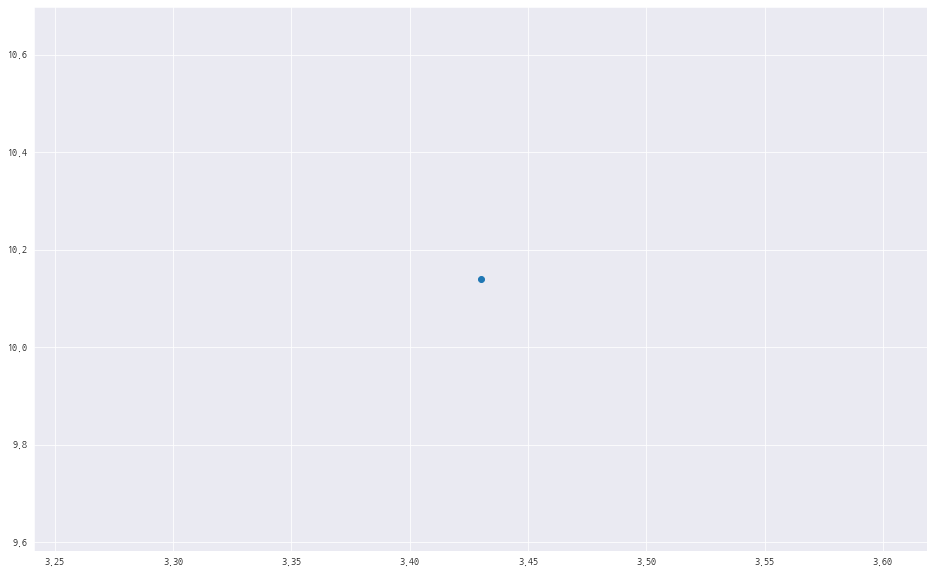

In [43]:
plt.figure(figsize=(16, 10))
plt.plot(xy.pickRate, xy.mmrGain, 'o')
plt.show()

In [44]:
rank.bestWeapon

0        18
1        18
2        16
3        16
4         9
         ..
19242     5
19243     5
19244     5
19245    16
19246    16
Name: bestWeapon, Length: 19247, dtype: int64

In [45]:
print(f'bestWeapon:{rank.bestWeapon[185]}=>{weaponNames[weaponNames.code == int(rank["equipment.0"].value_counts().index[185])].name.values[0]}')

bestWeapon:1=>바스타드소드


In [46]:
for i, weapon in rank.iterrows():
    print(f'bestWeapon:{weapon.bestWeapon}')
    print(weaponNames[weaponNames.code == weapon["equipment.0"]].name.values)

bestWeapon:18
['자웅일대검']
bestWeapon:18
['자웅일대검']
bestWeapon:16
['레바테인']
bestWeapon:16
['다인슬라이프']
bestWeapon:9
['엘레강스']
bestWeapon:9
['엘레강스']
bestWeapon:9
['엘레강스']
bestWeapon:9
['엘레강스']
bestWeapon:9
['엘레강스']
bestWeapon:9
['엘레강스']
bestWeapon:9
['마탄의사수']
bestWeapon:9
['엘레강스']
bestWeapon:9
['마탄의사수']
bestWeapon:5
['점착폭탄']
bestWeapon:5
['점착폭탄']
bestWeapon:5
['점착폭탄']
bestWeapon:5
['점착폭탄']
bestWeapon:5
['점착폭탄']
bestWeapon:5
['점착폭탄']
bestWeapon:5
['점착폭탄']
bestWeapon:5
['점착폭탄']
bestWeapon:5
['점착폭탄']
bestWeapon:1
['천잠장갑']
bestWeapon:1
['천잠장갑']
bestWeapon:18
['간장과막야']
bestWeapon:1
['천잠장갑']
bestWeapon:18
['간장과막야']
bestWeapon:1
['브레이질건틀릿']
bestWeapon:16
['다인슬라이프']
bestWeapon:11
['사사성광']
bestWeapon:11
['가우스라이플']
bestWeapon:11
['사사성광']
bestWeapon:11
['가우스라이플']
bestWeapon:11
['사사성광']
bestWeapon:11
['사사성광']
bestWeapon:11
['사사성광']
bestWeapon:5
['루테늄구슬']
bestWeapon:5
['점착폭탄']
bestWeapon:5
['점착폭탄']
bestWeapon:5
['파이어볼']
bestWeapon:5
['점착폭탄']
bestWeapon:5
['점착폭탄']
bestWeapon:5
['점착폭탄']
bestWeapon:21
['레드팬서']

In [47]:
rank[rank.bestWeapon==23]
characterNamesKr[characterNamesKr.code==57]

,code,name
56,57,마르티나


1: 글러브
2: 톤파
3: 방망이
4: 채찍
5: 투척
6: 암기
7: 활
8: 석궁
9: 권총
10: 돌격소총
11: 저격총
12: null
13: 망치
14: 도끼
15: 단검
16: 양손검
17: null
18: 쌍검
19: 창
20: 쌍절곤
21: 레이피어
22: 기타
23: 카메라
24: 아르카나
25: VF의수

In [48]:
characterNamesKr[characterNamesKr.code==1]

,code,name
0,1,재키


In [49]:
# 무기별 사용캐릭터 추가
weapon = pd.DataFrame({'num': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25],
                       'name': ["글러브", "톤파", "방망이", "채찍", "투척", "암기", "활", "석궁", "권총", "돌격소총", "저격총", "망치", "도끼", "단검", "양손검", "쌍검", "창", "쌍절곤", "레이피어", "기타", "카메라", "아르카나", "VF의수"],
                       'character':[['현우', '레온', '얀', '니키', '리다이린'],['현우', '레온', '얀', '아이작', '알렉스'],['바바라', '매그너스', '루크', '띠아'],['레녹스', '마이', '라우라'],
                                    ['시셀라', '이바', '이렘', '아드리아나', '윌리엄', '자히르', '셀린'],['시셀라', '엠마', '자히르', '타지아', '클로에', '혜진', '알렉스'],
                                    ['리오', '나딘', '혜진'],['나딘', '칼라'],['아야', '로지', '제니', '아이솔', '실비아', '알렉스'],['아야', '아이솔', '헤이즈'],
                                    ['아야', '버니스', '테오도르'],['매그너스', '수아', '일레븐'],['재키', '마커스', '에스텔'],['재키', '쇼이치', '캐시', '다니엘', '쇼우'],
                                    ['재키', '유키', '피오라', '에이든', '알렉스'],['재키', '카밀로', '유키', '캐시'],['쇼우', '펠릭스', '피오라'],['리다이린', '피올로'],
                                    ['피오라', '키아라', '카밀로', '아델라', '엘레나'],['하트', '프리야'],['나타폰', '마르티나'],['요한', '비앙카', '엠마', '아디나'],['에키온']]})
weapon



,num,name,character
0,1,글러브,"[현우, 레온, 얀, 니키, 리다이린]"
1,2,톤파,"[현우, 레온, 얀, 아이작, 알렉스]"
2,3,방망이,"[바바라, 매그너스, 루크, 띠아]"
3,4,채찍,"[레녹스, 마이, 라우라]"
4,5,투척,"[시셀라, 이바, 이렘, 아드리아나, 윌리엄, 자히르, 셀린]"
5,6,암기,"[시셀라, 엠마, 자히르, 타지아, 클로에, 혜진, 알렉스]"
6,7,활,"[리오, 나딘, 혜진]"
7,8,석궁,"[나딘, 칼라]"
8,9,권총,"[아야, 로지, 제니, 아이솔, 실비아, 알렉스]"
9,10,돌격소총,"[아야, 아이솔, 헤이즈]"


번외(권총+암기+톤파+양손검) : 알렉스
1. 글러브 : 현우, 레온, 얀, 니키
2. 톤파 : 현우, 레온, 얀, 아이작
3. 방망이 : 바바라, 매그너스, 루크, 띠아
4. 채찍 : 레녹스, 마이, 라우라
5. 투척 : 시셀라, 이바, 이렘, 아드리아나, 윌리엄, 자히르, 셀린
6. 암기 : 시셀라, 엠마, 자히르, 타지아, 클로에, 혜진
7. 활 : 리오, 나딘, 혜진
8. 석궁 : 나딘, 칼라
9. 권총 : 아야, 로지, 제니, 아이솔, 실비아
10. 돌격소총 : 아야, 아이솔, 헤이즈
11. 저격총 : 아야, 버니스, 테오도르
13. 망치 : 매그너스, 수아, 일레븐
14. 도끼 : 재키, 마커스, 에스텔
15. 단검 : 재키, 쇼이치, 캐시, 다니엘, 쇼우
16. 양손검 : 재키, 유키, 피오라, 에이든
18. 쌍검 : 재키, 카밀로, 유키, 캐시
19. 창 : 쇼우, 펠릭스, 피오라
20. 쌍절곤 : 리다이린, 피올로
21. 레이피어 : 피오라, 키아라, 카밀로, 아델라, 엘레나
22. 기타 : 하트, 프리야
23. 카메라 : 나타폰, 마르티나
24. 아르카나 : 요한, 비앙카, 엠마, 아디나
25. VF의수 : 에키온

In [50]:
%%time
# 62개 캐릭터의 핵심 정보

df_code = pd.DataFrame()
df_characterStats = pd.DataFrame()

for i in range(1, 63):
    character = pd.concat([df_code, rank[rank.characterNum == i]])

    stat = (
        # 실험체 이름
        f'{"{"}"characterName" : "{characterNamesKr.name[i - 1]}", '
        # 실험체 번호
        f'"characterCode" : "{characterNamesKr.code[i - 1]}", '
        # 가장 많이 사용한 스킨, 사용 횟수
        f'"mostSkin" : "{skinNames[skinNames.code == int(character.skinCode.value_counts().head(1).index[0])].values[0][0]}", "mostSkinCount" : {character.skinCode.value_counts().head(1).values[0]}, '

        # 무기(이대로 사용하면 가장 많이 사용한 무기로 나머지 무기도 통합됨)
        f'"characterWeapon" : "{weapon[weapon.num==character.bestWeapon.values[0]].name.values[0]}",'

        # 여기부터 마지막까지 아래와 같은 리스트형식으로 무기별 분류 필요
        #  ([ {무기군1: 킬수}, {무기군2 : 킬수} ...])
        #  ([ {무기군1: 루트무기}, {무기군2 : 루트무기} ...] )

        # 평균 플레이어 킬수
        f'"averageKillPlayer" : {character.playerKill.mean():.2f}, '
        # 평균 플레이어 데미지
        f'"averageDamegeToPlayer" : {character.damageToPlayer.mean():.2f}, '
        # 평균 야동 킬수
        f'"averageKillMonster" : {character.monsterKill.mean():.2f}, '
        # 평균 야동 데미지
        f'"averageDamegeToMonster" : {character.damageToMonster.mean():.2f}, '
        # 게임 플레이 수
        f'"totalGames" : {character.count()[0]}, '
        # 평균 승률
        f'"winRate" : {character[character.victory == 1].victory.count() / character.victory.count():.2f}, '
        # 평균 등수
        f'"averageRank" : {character[character.escapeState != 3].gameRank.mean():.2f}, '
        # 탈출 횟수
        f'"escapeCount" : {character[character.escapeState == 3].escapeState.count()}, '
        # 평균 mmr 획득률
        f'"averageMMR" : {character.mmrGain.mean():.2f}, '
        # 픽률
        f'"pickRate" : {character.count()[0] / 19248 * 100:.2f},'


        # 승리했던 경기에서 가장 많이 사용한 최종 아이템, 사용 횟수
        f'"winWeapon" : "{weaponNames[weaponNames.code == int(character[character.victory == 1]["equipment.0"].value_counts().head(1).index[0])].values[0][1]}", "winWeaponCount" : {character[character.victory == 1]["equipment.0"].value_counts().head(1).values[0]}, '
        f'"winBody" : "{armorNames[armorNames.code == int(character[character.victory == 1]["equipment.1"].value_counts().head(1).index[0])].values[0][1]}", "winBodyCount" : {character[character.victory == 1]["equipment.1"].value_counts().head(1).values[0]}, '
        f'"winHead" : "{armorNames[armorNames.code == int(character[character.victory == 1]["equipment.2"].value_counts().head(1).index[0])].values[0][1]}", "winHeadCount" : {character[character.victory == 1]["equipment.2"].value_counts().head(1).values[0]}, '
        f'"winArm" : "{armorNames[armorNames.code == int(character[character.victory == 1]["equipment.3"].value_counts().head(1).index[0])].values[0][1]}", "winArmCount" : {character[character.victory == 1]["equipment.3"].value_counts().head(1).values[0]}, '
        f'"winFoot" : "{armorNames[armorNames.code == int(character[character.victory == 1]["equipment.4"].value_counts().head(1).index[0])].values[0][1]}", "winFootCount" : {character[character.victory == 1]["equipment.4"].value_counts().head(1).values[0]}, '
        f'"winTinkled" : "{armorNames[armorNames.code == int(character[character.victory == 1]["equipment.5"].value_counts().head(1).index[0])].values[0][1]}", "winTinkledCount" : {character[character.victory == 1]["equipment.5"].value_counts().head(1).values[0]}, '

        # 가장 많이 선택한 루트 아이템, 사용 횟수
        f'"routeWeapon" : "{weaponNames[weaponNames.code == int(character["equipFirstItemForLog.0"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeWeaponCount" : {character["equipFirstItemForLog.0"].value_counts().head(1)[0]}, '
        f'"routeBody" : "{armorNames[armorNames.code == int(character["equipFirstItemForLog.1"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeBodyCount" : {character["equipFirstItemForLog.1"].value_counts().head(1)[0]}, '
        f'"routeHead" : "{armorNames[armorNames.code == int(character["equipFirstItemForLog.2"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeHeadCount" : {character["equipFirstItemForLog.2"].value_counts().head(1)[0]}, '
        f'"routeArm" : "{armorNames[armorNames.code == int(character["equipFirstItemForLog.3"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeArmCount" : {character["equipFirstItemForLog.3"].value_counts().head(1)[0]}, '
        f'"routeFoot" : "{armorNames[armorNames.code == int(character["equipFirstItemForLog.4"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeFootCount" : {character["equipFirstItemForLog.4"].value_counts().head(1)[0]}, '

        f'"routeTinkled" : "", "routeTinkledCount" : ""{"}"}'
    )
    df_characterStats = pd.concat([df_characterStats, json_normalize(json.loads(stat))])
    del character, stat
df_characterStats = df_characterStats.set_index('characterCode')


Wall time: 3.49 s


In [68]:
mmr = df_characterStats.averageMMR.mean()
pick = df_characterStats.pickRate.mean()

In [69]:
xy = pd.DataFrame()
for i, char in df_characterStats.iterrows():
    xy = pd.concat([xy, json_normalize(json.loads(
        f'{"{"}"characterCode" : {characterNamesKr[characterNamesKr.name == char.characterName].code.values[0]} ,"characterName" : "{characterNamesKr[characterNamesKr.name == char.characterName].name.values[0]}" ,"pickRate" : {df_characterStats.totalGames[i] / 19248 * 100:.2f}, "mmrGain" : {df_characterStats.averageMMR[i]:.2f}{"}"}'))])
xy

,characterCode,characterName,pickRate,mmrGain
0,1,재키,3.43000,10.14000
0,2,아야,4.89000,7.36000
0,3,피오라,1.51000,9.33000
0,4,매그너스,1.63000,8.05000
0,5,자히르,0.21000,8.57000
...,...,...,...,...
0,58,헤이즈,2.01000,6.75000
0,59,아이작,2.66000,9.41000
0,60,타지아,0.34000,12.00000
0,61,이렘,0.72000,10.08000


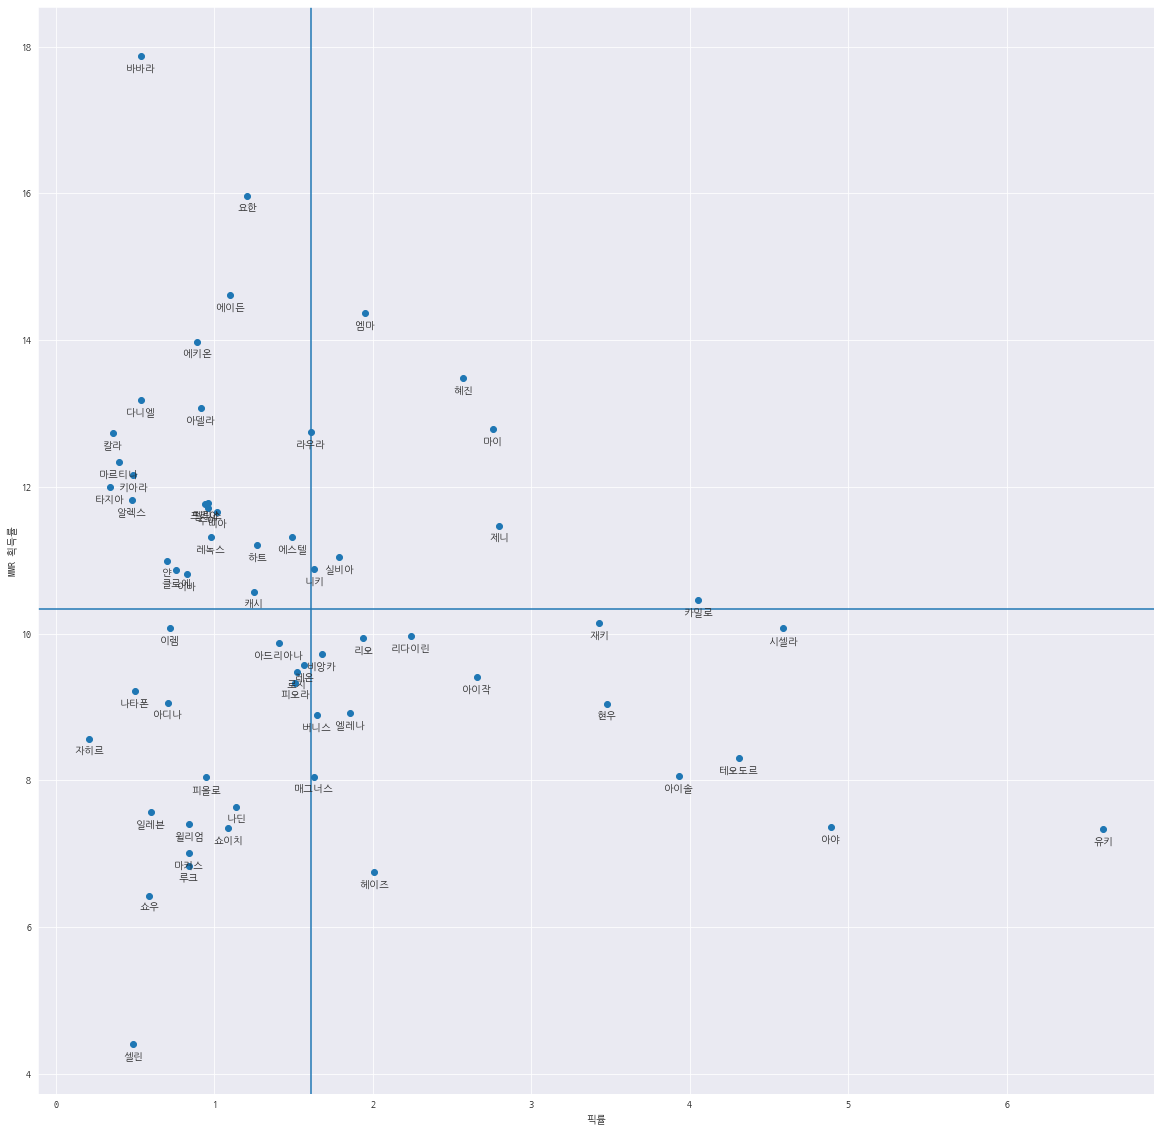

In [70]:
plt.figure(figsize=(20, 20))
plt.scatter(xy.pickRate, xy.mmrGain)
plt.axhline(mmr,0,1)
plt.axvline(pick,0,1)
plt.xlabel('픽률')
plt.ylabel('MMR 획득률')
for _,j in xy.iterrows():
    plt.annotate(j.characterName,
                 (j.pickRate, j.mmrGain),
                 textcoords="offset points", # 텍스트 위치를 (x,y)로 부터의 오프셋 (offset_x, offset_y)로 지정
                 xytext=(0, -15), # (x, y)로 부터의 오프셋 (offset_x, offset_y), 여기에선 y 좌표로 +20 이동합니다.
                 ha='center')

plt.show()

In [55]:
weapon

,num,name,character
0,1,글러브,"[현우, 레온, 얀, 니키, 리다이린]"
1,2,톤파,"[현우, 레온, 얀, 아이작, 알렉스]"
2,3,방망이,"[바바라, 매그너스, 루크, 띠아]"
3,4,채찍,"[레녹스, 마이, 라우라]"
4,5,투척,"[시셀라, 이바, 이렘, 아드리아나, 윌리엄, 자히르, 셀린]"
5,6,암기,"[시셀라, 엠마, 자히르, 타지아, 클로에, 혜진, 알렉스]"
6,7,활,"[리오, 나딘, 혜진]"
7,8,석궁,"[나딘, 칼라]"
8,9,권총,"[아야, 로지, 제니, 아이솔, 실비아, 알렉스]"
9,10,돌격소총,"[아야, 아이솔, 헤이즈]"


In [56]:
# # 무기별 사용캐릭터 샘플 (폐?기)
# test = characterNamesKr.name[6]
# if test in weapon[weapon.num==1].character[0]:
#     print(f'{test}는 {weapon[weapon.num == 1].name[0]}를 사용할 수 있음')
# else:
#     print(f'{test}는 {weapon[weapon.num == 1].name}를 사용할 수 없음')
# test
pass

In [57]:
# 캐릭터 무기군 분류 샘플
for i in range(len(Jakie.bestWeapon.value_counts())):
    print(f'{characterNamesKr[characterNamesKr.code == Jakie.characterNum[0]].values[0][1]}({weapon[weapon.num == Jakie[Jakie.bestWeapon == Jakie.bestWeapon.value_counts().index[i]].bestWeapon.values[0]].name.values[0]})')

재키(단검)
재키(쌍검)
재키(양손검)
재키(도끼)


In [58]:
# 노가다 샘플
Jakie_axe = pd.DataFrame()
Jakie_axe = pd.concat([Jakie_axe,Jakie[Jakie.bestWeapon==14]],ignore_index=True)
Jakie_axe.insert(7,'name','재키(도끼)')
Jakie_axe
Jakie_dagger = pd.DataFrame()
Jakie_dagger = pd.concat([Jakie_dagger,Jakie[Jakie.bestWeapon==15]],ignore_index=True)
Jakie_dagger.insert(7,'name','재키(단검)')
Jakie_dagger
Jakie_THsward = pd.DataFrame()
Jakie_THsward = pd.concat([Jakie_THsward,Jakie[Jakie.bestWeapon==16]],ignore_index=True)
Jakie_THsward.insert(7,'name','재키(양손검)')
Jakie_THsward
Jakie_Dsward = pd.DataFrame()
Jakie_Dsward = pd.concat([Jakie_Dsward,Jakie[Jakie.bestWeapon==18]],ignore_index=True)
Jakie_Dsward.insert(7,'name','재키(쌍검)')
Jakie_Dsward
Jakie_all = pd.concat([Jakie_axe,Jakie_dagger,Jakie_THsward,Jakie_Dsward],ignore_index=True)
Jakie_all

,userNum,nickname,gameId,seasonId,matchingMode,matchingTeamMode,characterNum,name,skinCode,characterLevel,...,skillLevelInfo.1026310,skillLevelInfo.1006310,skillLevelInfo.1055430,skillLevelInfo.1012310,Unnamed: 0,skillLevelInfo.1026420,skillLevelInfo.1036410,eventMissionResult.162,skillLevelInfo.1040310,skillLevelInfo.1041210
0,1110356,연재앙,22620575,15,3,3,1,재키(도끼),1001002,15,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,2230562,Korra00,22600862,15,3,3,1,재키(도끼),1001003,15,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,213928,Twitch김쿰,22576966,15,3,3,1,재키(도끼),1001003,17,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,2216452,금태양나루토,22575100,15,3,3,1,재키(도끼),1001002,16,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,1796986,ATRI初号机,22623068,15,3,3,1,재키(도끼),1001001,17,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,213928,Twitch김쿰,22706092,15,3,3,1,재키(쌍검),1001001,15,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
657,213928,Twitch김쿰,22705631,15,3,3,1,재키(쌍검),1001001,18,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
658,213928,Twitch김쿰,22705142,15,3,3,1,재키(쌍검),1001002,17,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
659,213928,Twitch김쿰,22704637,15,3,3,1,재키(쌍검),1001003,18,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [59]:
print((len(Jakie.bestWeapon.value_counts())))
print(Jakie.bestWeapon.value_counts().index)
print(f'{characterNamesKr[characterNamesKr.code == Jakie.characterNum[0]].values[0][1]}({weapon[weapon.num == Jakie[Jakie.bestWeapon == Jakie.bestWeapon.value_counts().index[0]].bestWeapon.values[0]].name.values[0]})')

4
Int64Index([15, 18, 16, 14], dtype='int64')
재키(단검)


In [60]:
# 캐릭터 무기군 분류 샘플
for i in range(len(Jakie.bestWeapon.value_counts())):
    print(f'{characterNamesKr[characterNamesKr.code == Jakie.characterNum[0]].values[0][1]}({weapon[weapon.num == Jakie[Jakie.bestWeapon == Jakie.bestWeapon.value_counts().index[i]].bestWeapon.values[0]].name.values[0]})')

재키(단검)
재키(쌍검)
재키(양손검)
재키(도끼)


In [61]:
# for문용 샘플코드
# a=0~3

test = pd.DataFrame()
for i in range(len(Jakie.bestWeapon.value_counts())):
    test = pd.concat([test,Jakie[Jakie.bestWeapon==Jakie[Jakie.bestWeapon == Jakie.bestWeapon.value_counts().index[i]].bestWeapon.values[0]]],ignore_index=True)
test.insert(7,'name',f'{characterNamesKr[characterNamesKr.code == Jakie.characterNum[0]].values[0][1]}({weapon[weapon.num == Jakie[Jakie.bestWeapon == Jakie.bestWeapon.value_counts().index[i]].bestWeapon.values[0]].name.values[0]})')
test

,userNum,nickname,gameId,seasonId,matchingMode,matchingTeamMode,characterNum,name,skinCode,characterLevel,...,skillLevelInfo.1026310,skillLevelInfo.1006310,skillLevelInfo.1055430,skillLevelInfo.1012310,Unnamed: 0,skillLevelInfo.1026420,skillLevelInfo.1036410,eventMissionResult.162,skillLevelInfo.1040310,skillLevelInfo.1041210
0,1197081,통빡대영,22617591,15,3,3,1,재키(도끼),1001002,17,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,207458,SOS,22617735,15,3,3,1,재키(도끼),1001002,18,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,126501,poiqas,22614003,15,3,3,1,재키(도끼),1001001,18,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,126501,poiqas,22613622,15,3,3,1,재키(도끼),1001001,16,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,126501,poiqas,22613112,15,3,3,1,재키(도끼),1001001,18,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,392957,딸기요거트스무디,22728009,15,3,3,1,재키(도끼),1001003,18,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
657,392957,딸기요거트스무디,22727697,15,3,3,1,재키(도끼),1001003,14,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
658,392957,딸기요거트스무디,22682796,15,3,3,1,재키(도끼),1001003,16,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
659,392957,딸기요거트스무디,22676231,15,3,3,1,재키(도끼),1001003,16,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [62]:
print(Jakie.bestWeapon.value_counts().index)

Int64Index([15, 18, 16, 14], dtype='int64')


In [71]:
%%time
test = pd.DataFrame()
for i in range(len(Jakie.bestWeapon.value_counts())):
    test = pd.concat([test, Jakie[
        Jakie.bestWeapon == Jakie[Jakie.bestWeapon == Jakie.bestWeapon.value_counts().index[i]].bestWeapon.values[0]]])
test.insert(7, 'name', '')
for i, j in Jakie.iterrows():
    test.name[i] = \
        f'{characterNamesKr[characterNamesKr.code == j.characterNum].values[0][1]}({weapon[j.bestWeapon == weapon.num].name.values[0]})'
test

Wall time: 590 ms


,userNum,nickname,gameId,seasonId,matchingMode,matchingTeamMode,characterNum,name,skinCode,characterLevel,...,skillLevelInfo.1026310,skillLevelInfo.1006310,skillLevelInfo.1055430,skillLevelInfo.1012310,Unnamed: 0,skillLevelInfo.1026420,skillLevelInfo.1036410,eventMissionResult.162,skillLevelInfo.1040310,skillLevelInfo.1041210
13,1197081,통빡대영,22617591,15,3,3,1,재키(단검),1001002,17,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
14,207458,SOS,22617735,15,3,3,1,재키(단검),1001002,18,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
17,126501,poiqas,22614003,15,3,3,1,재키(단검),1001001,18,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
18,126501,poiqas,22613622,15,3,3,1,재키(단검),1001001,16,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
19,126501,poiqas,22613112,15,3,3,1,재키(단검),1001001,18,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,392957,딸기요거트스무디,22728009,15,3,3,1,재키(도끼),1001003,18,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
637,392957,딸기요거트스무디,22727697,15,3,3,1,재키(도끼),1001003,14,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
638,392957,딸기요거트스무디,22682796,15,3,3,1,재키(도끼),1001003,16,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
639,392957,딸기요거트스무디,22676231,15,3,3,1,재키(도끼),1001003,16,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [73]:
del [[test]]

Wall time: 19.9 s


,userNum,nickname,gameId,seasonId,matchingMode,matchingTeamMode,characterNum,nameW,skinCode,characterLevel,...,skillLevelInfo.1026310,skillLevelInfo.1006310,skillLevelInfo.1055430,skillLevelInfo.1012310,Unnamed: 0,skillLevelInfo.1026420,skillLevelInfo.1036410,eventMissionResult.162,skillLevelInfo.1040310,skillLevelInfo.1041210
4,1199780,탐피,22618328,15,3,3,2,아야(권총),1002002,15,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
5,1199780,탐피,22617735,15,3,3,2,아야(권총),1002002,19,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
6,1199780,탐피,22617172,15,3,3,2,아야(권총),1002002,15,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
7,1199780,탐피,22616560,15,3,3,2,아야(권총),1002002,13,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
8,1199780,탐피,22615555,15,3,3,2,아야(권총),1002002,16,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17166,3167172,Star,22763682,15,3,3,54,칼라(석궁),1054001,14,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
17851,108043,기록자의티파티,22759318,15,3,3,54,칼라(석궁),1054001,16,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
18093,255918,주앙펠릭스,22744596,15,3,3,54,칼라(석궁),1054001,8,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
18577,397741,디데이,22748497,15,3,3,54,칼라(석궁),1054001,3,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [74]:

rank_final = pd.read_csv('data/rank_final - changed.csv')
rank_final

,Unnamed: 0,userNum,nickname,gameId,seasonId,matchingMode,matchingTeamMode,characterNum,nameW,skinCode,...,skillLevelInfo.1026310,skillLevelInfo.1006310,skillLevelInfo.1055430,skillLevelInfo.1012310,Unnamed: 0.1,skillLevelInfo.1026420,skillLevelInfo.1036410,eventMissionResult.162,skillLevelInfo.1040310,skillLevelInfo.1041210
0,4,1199780,탐피,22618328,15,3,3,2,아야(권총),1002002,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,5,1199780,탐피,22617735,15,3,3,2,아야(권총),1002002,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,6,1199780,탐피,22617172,15,3,3,2,아야(권총),1002002,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,7,1199780,탐피,22616560,15,3,3,2,아야(권총),1002002,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,8,1199780,탐피,22615555,15,3,3,2,아야(권총),1002002,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19242,17166,3167172,Star,22763682,15,3,3,54,칼라(석궁),1054001,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
19243,17851,108043,기록자의티파티,22759318,15,3,3,54,칼라(석궁),1054001,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
19244,18093,255918,주앙펠릭스,22744596,15,3,3,54,칼라(석궁),1054001,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
19245,18577,397741,디데이,22748497,15,3,3,54,칼라(석궁),1054001,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [75]:
%%time
characterList = pd.DataFrame()

for i in range(len(rank_final.nameW.value_counts())):
    gg = f'{"{"}"nameW" : "{rank_final.nameW.value_counts().index[i]}","code" : {rank_final[rank_final.nameW == rank_final.nameW.value_counts().index[i]].characterNum.values[0]}{"}"}'

    characterList = pd.concat([characterList, json_normalize(json.loads(gg))], ignore_index=True)
characterList = characterList.sort_values('code')
characterList = characterList.reset_index(drop=True)
characterList

Wall time: 583 ms


,nameW,code
0,재키(단검),1
1,재키(양손검),1
2,재키(쌍검),1
3,재키(도끼),1
4,아야(권총),2
...,...,...
79,헤이즈(돌격소총),58
80,아이작(톤파),59
81,타지아(암기),60
82,이렘(투척),61


In [98]:

%%time
# 62개 캐릭터의 핵심 정보

df_code = pd.DataFrame()
df_characterStats = pd.DataFrame()

for i in range(84):
    character = pd.concat([df_code, rank_final[rank_final.nameW==characterList.nameW[i]]])
    stat = (
        # 실험체 이름
        f'{"{"}"characterName" : "{characterList.nameW[i]}", '
        # 실험체 번호
        f'"characterCode" : "{characterList.code[i]}", '
        # 가장 많이 사용한 스킨, 사용 횟수
        f'"mostSkin" : "{skinNames[skinNames.code == int(character.skinCode.value_counts().head(1).index[0])].values[0][0]}", "mostSkinCount" : {character.skinCode.value_counts().head(1).values[0]}, '

        # 무기(이대로 사용하면 가장 많이 사용한 무기로 나머지 무기도 통합됨)
        f'"characterWeapon" : "{weapon[weapon.num==character.bestWeapon.values[0]].name.values[0]}",'

        # 여기부터 마지막까지 아래와 같은 리스트형식으로 무기별 분류 필요
        #  ([ {무기군1: 킬수}, {무기군2 : 킬수} ...])
        #  ([ {무기군1: 루트무기}, {무기군2 : 루트무기} ...] )

        # 평균 플레이어 킬수
        f'"averageKillPlayer" : {character.playerKill.mean():.2f}, '
        # 평균 플레이어 데미지
        f'"averageDamegeToPlayer" : {character.damageToPlayer.mean():.2f}, '
        # 평균 야동 킬수
        f'"averageKillMonster" : {character.monsterKill.mean():.2f}, '
        # 평균 야동 데미지
        f'"averageDamegeToMonster" : {character.damageToMonster.mean():.2f}, '
        # 게임 플레이 수
        f'"totalGames" : {character.count()[0]}, '
        # # 평균 승률 => 자히르 투척 승률 0%짜리 터짐
        f'"winRate" : {character[character.victory == 1].victory.count() / character.victory.count():.2f}, '

        # 평균 등수
        f'"averageRank" : {character[character.escapeState != 3].gameRank.mean():.2f}, '
        # 탈출 횟수
        f'"escapeCount" : {character[character.escapeState == 3].escapeState.count()}, '
        # 평균 mmr 획득률
        f'"averageMMR" : {character.mmrGain.mean():.2f}, '
        # 픽률
        f'"pickRate" : {character.count()[0] / 19248 * 100:.2f},'


        # 최종 아이템, 사용 횟수
        f'"finalWeapon" : "{weaponNames[weaponNames.code == int(character["equipment.0"].value_counts().head(1).index[0])].values[0][1]}", "finalWeaponCount" : {character["equipment.0"].value_counts().head(1).values[0]}, '
        f'"finalBody" : "{armorNames[armorNames.code == int(character["equipment.1"].value_counts().head(1).index[0])].values[0][1]}", "finalBodyCount" : {character["equipment.1"].value_counts().head(1).values[0]}, '
        f'"finalHead" : "{armorNames[armorNames.code == int(character["equipment.2"].value_counts().head(1).index[0])].values[0][1]}", "finalHeadCount" : {character["equipment.2"].value_counts().head(1).values[0]}, '
        f'"finalArm" : "{armorNames[armorNames.code == int(character["equipment.3"].value_counts().head(1).index[0])].values[0][1]}", "finalArmCount" : {character["equipment.3"].value_counts().head(1).values[0]}, '
        f'"finalFoot" : "{armorNames[armorNames.code == int(character["equipment.4"].value_counts().head(1).index[0])].values[0][1]}", "finalFootCount" : {character["equipment.4"].value_counts().head(1).values[0]}, '
        f'"finalTinkled" : "{armorNames[armorNames.code == int(character["equipment.5"].value_counts().head(1).index[0])].values[0][1]}", "finalTinkledCount" : {character["equipment.5"].value_counts().head(1).values[0]}, '

        # 가장 많이 선택한 루트 아이템, 사용 횟수
        f'"routeWeapon" : "{weaponNames[weaponNames.code == int(character["equipFirstItemForLog.0"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeWeaponCount" : {character["equipFirstItemForLog.0"].value_counts().head(1)[0]}, '
        f'"routeBody" : "{armorNames[armorNames.code == int(character["equipFirstItemForLog.1"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeBodyCount" : {character["equipFirstItemForLog.1"].value_counts().head(1)[0]}, '
        f'"routeHead" : "{armorNames[armorNames.code == int(character["equipFirstItemForLog.2"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeHeadCount" : {character["equipFirstItemForLog.2"].value_counts().head(1)[0]}, '
        f'"routeArm" : "{armorNames[armorNames.code == int(character["equipFirstItemForLog.3"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeArmCount" : {character["equipFirstItemForLog.3"].value_counts().head(1)[0]}, '
        f'"routeFoot" : "{armorNames[armorNames.code == int(character["equipFirstItemForLog.4"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeFootCount" : {character["equipFirstItemForLog.4"].value_counts().head(1)[0]}, '

        f'"routeTinkled" : "", "routeTinkledCount" : ""{"}"}'
    )
    df_characterStats = pd.concat([df_characterStats, json_normalize(json.loads(stat))],ignore_index=True)
    del character, stat
df_characterStats


Wall time: 3.7 s


,characterName,characterCode,mostSkin,mostSkinCount,characterWeapon,averageKillPlayer,averageDamegeToPlayer,averageKillMonster,averageDamegeToMonster,totalGames,...,routeBody,routeBodyCount,routeHead,routeHeadCount,routeArm,routeArmCount,routeFoot,routeFootCount,routeTinkled,routeTinkledCount
0,재키(단검),1,스칼렛 코사지 재키,87,단검,2.88000,"8,349.14000",30.48000,"40,503.32000",219,...,성기사의갑옷,89,수정티아라,100,바이탈센서,168,경량화부츠,169,,
1,재키(양손검),1,재키,84,양손검,2.55000,"7,205.29000",29.46000,"38,669.75000",167,...,광학미채수트,102,수정티아라,116,바이탈센서,98,부케팔로스,99,,
2,재키(쌍검),1,시스템쇼크 재키,78,쌍검,3.56000,"9,508.02000",28.12000,"34,974.54000",206,...,광학미채수트,63,수정티아라,119,바이탈센서,149,부케팔로스,126,,
3,재키(도끼),1,시스템쇼크 재키,35,도끼,2.41000,"7,121.12000",30.71000,"37,961.72000",69,...,턱시도,40,성기사의투구,37,플라즈마아크,43,매버릭러너,37,,
4,아야(권총),2,불꽃놀이 아야,150,권총,2.50000,"9,635.99000",25.57000,"30,867.61000",236,...,지휘관의갑옷,117,제국왕관,119,드라우프니르,115,풍화륜,146,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,헤이즈(돌격소총),58,암흑가 헤이즈,224,돌격소총,2.46000,"11,080.11000",18.20000,"21,879.78000",386,...,지휘관의갑옷,266,황실부르고넷,295,틴달로스의팔찌,256,아이젠,242,,
80,아이작(톤파),59,암흑가 아이작,309,톤파,2.43000,"7,372.01000",18.62000,"21,601.14000",512,...,EOD수트,354,전술OPS헬멧,397,샤자한의검집,378,경량화부츠,281,,
81,타지아(암기),60,타지아,39,암기,3.33000,"9,196.26000",13.47000,"16,505.85000",66,...,고위사제복,57,제국왕관,60,아이기스,44,SCV,41,,
82,이렘(투척),61,눈싸움 이렘,107,투척,2.15000,"7,031.30000",15.59000,"18,930.38000",138,...,EOD수트,96,제국왕관,124,스포츠시계,80,타키온브레이스,56,,


In [92]:
xy

""


In [104]:
characterList.nameW

0        재키(단검)
1       재키(양손검)
2        재키(쌍검)
3        재키(도끼)
4        아야(권총)
        ...    
79    헤이즈(돌격소총)
80      아이작(톤파)
81      타지아(암기)
82       이렘(투척)
83    테오도르(저격총)
Name: nameW, Length: 84, dtype: object

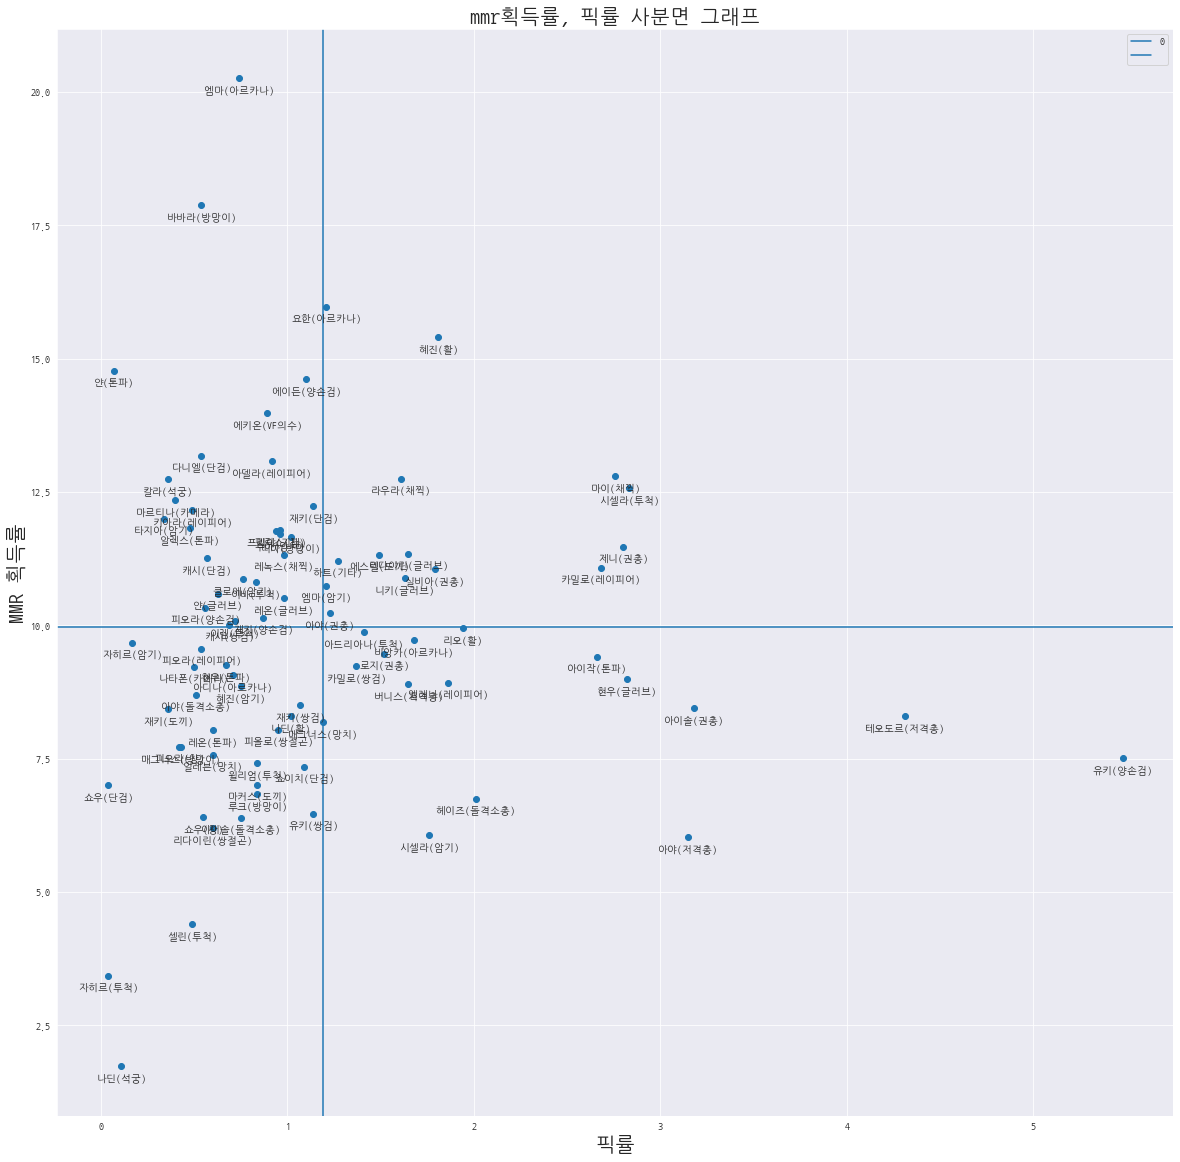

In [105]:
mmr = df_characterStats.averageMMR.mean()
pick = df_characterStats.pickRate.mean()
xy = pd.DataFrame()
for i, char in df_characterStats.iterrows():
    xy = pd.concat([xy, json_normalize(json.loads(
        f'{"{"}"characterCode" : {characterList[characterList.nameW == char.characterName].code.values[0]} ,"characterName" : "{characterList[characterList.nameW == char.characterName].nameW.values[0]}" ,"pickRate" : {df_characterStats.totalGames[i] / 19248 * 100:.2f}, "mmrGain" : {df_characterStats.averageMMR[i]:.2f}{"}"}'))])

plt.figure(figsize=(20, 20))

plt.axhline(mmr, 0, 1)
plt.axvline(pick, 0, 1)
plt.xlabel('픽률',fontsize=20)
plt.ylabel('MMR 획득률', fontsize=20)

plt.title('mmr획득률, 픽률 사분면 그래프', fontsize=20)
for i, j in xy.iterrows():
    plt.annotate(j.characterName,
                 (j.pickRate, j.mmrGain),
                 textcoords="offset points",  # 텍스트 위치를 (x,y)로 부터의 오프셋 (offset_x, offset_y)로 지정
                 xytext=(0, -15),  # (x, y)로 부터의 오프셋 (offset_x, offset_y), 여기에선 y 좌표로 +20 이동합니다.
                 ha='center')
plt.scatter(xy.pickRate, xy.mmrGain)


plt.show()